In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Exploring the data

In [2]:
Train=pd.read_csv(r'C:\Users\pandy\Downloads\6a62a5b4967411ea\Dataset\Train.csv')

In [3]:
Test=pd.read_csv(r'C:\Users\pandy\Downloads\6a62a5b4967411ea\Dataset\Test.csv')

In [4]:
Train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [6]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [7]:
Train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

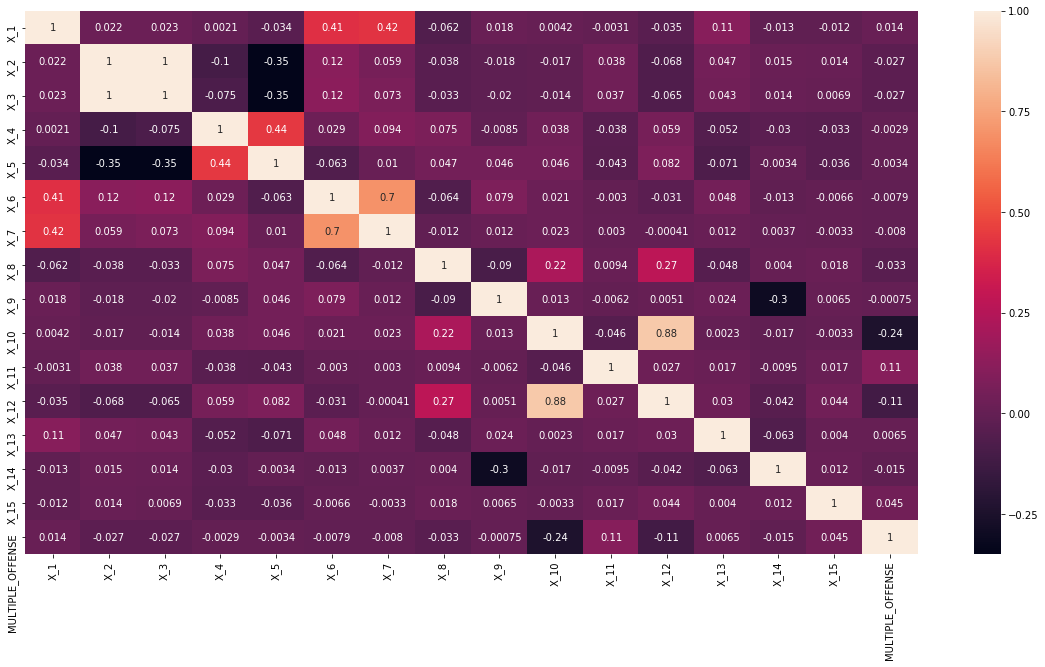

In [8]:
x=Train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(x,annot=True)

In [9]:
# Removing columns having high correlation
Train.drop(['X_6','X_12','X_3','DATE'],axis=1,inplace=True)
Test.drop(['X_6','X_12','X_3','DATE'],axis=1,inplace=True)

## Spliting into input and target variable

In [10]:
X_train=Train.drop(['INCIDENT_ID','MULTIPLE_OFFENSE'],axis=1)
y_train=Train['MULTIPLE_OFFENSE']

In [11]:
X_test=Test.drop('INCIDENT_ID',axis=1)

In [12]:
# Normalising data
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

## Training and Evaluating various Models 

In [13]:
from sklearn import linear_model,metrics

log_model=linear_model.LogisticRegression()

log_model.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred=log_model.predict(X_test)

In [15]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":y_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results3.csv',index=False)

In [16]:
from sklearn.metrics import plot_roc_curve

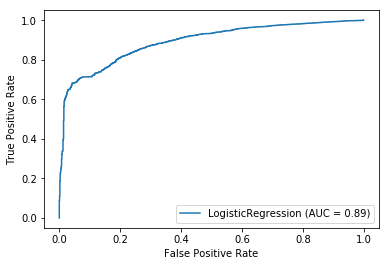

In [17]:
plot_roc_curve(log_model,X_train,y_train)

In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
dtc_pred = dtc.predict(X_test)

In [21]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":dtc_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results.csv',index=False)

In [22]:
# Random Forest deals well with high class imbalance
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [24]:
rfc_pred=rfc.predict(X_test)

In [25]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":rfc_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results1.csv',index=False)

In [26]:
importances=list(rfc.feature_importances_)

In [27]:
feature_list = list(X_train.columns)

In [28]:
# Zip feature and feature importance, round importance value upto 2 decimal
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: X_11                 Importance: 0.38
Variable: X_10                 Importance: 0.22
Variable: X_15                 Importance: 0.19
Variable: X_2                  Importance: 0.04
Variable: X_7                  Importance: 0.03
Variable: X_13                 Importance: 0.03
Variable: X_14                 Importance: 0.03
Variable: X_4                  Importance: 0.02
Variable: X_8                  Importance: 0.02
Variable: X_1                  Importance: 0.01
Variable: X_5                  Importance: 0.01
Variable: X_9                  Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None, None]

## Over sampling 

In [29]:
hack=Train[Train.MULTIPLE_OFFENSE==1]
not_hack=Train[Train.MULTIPLE_OFFENSE==0]

In [30]:
from sklearn.utils import resample
not_hack_upsampled = resample(not_hack,
                          replace=True,
                          n_samples=len(hack), 
                          random_state=27)

In [31]:
Train_upsampled=pd.concat([hack,not_hack_upsampled])

In [32]:
X_train_up=Train_upsampled.drop(['INCIDENT_ID','MULTIPLE_OFFENSE'],axis=1)
X_train_up=(X_train_up-X_train_up.mean())/X_train_up.std()

In [33]:
y_train_up=Train_upsampled['MULTIPLE_OFFENSE']

In [34]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train_up, y_train_up)
rfc_pred=rfc.predict(X_test)

In [35]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":rfc_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results2.csv',index=False)

In [36]:
output.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [37]:
log_model=linear_model.LogisticRegression()

log_model.fit(X_train_up,y_train_up)

LogisticRegression()

In [38]:
y_pred=log_model.predict(X_test)

In [39]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":y_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results3.csv',index=False)

In [38]:
output.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [59]:
# Over sampling worked well in log model while failed in random forest, so we will not use oversampling

## Hyperparameter Tuning

In [51]:
# Check parameters to use
RandomForestClassifier?

In [52]:
from pprint import pprint
pprint(rfc.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [53]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
# Number of trees in random forest
n_estimators = [9,10,11]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [9, 10, 11]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [9, 10, 11]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [46]:
X_test=Test.drop('INCIDENT_ID',axis=1)
X_test=(X_test-X_test.mean())/X_test.std()

In [47]:
y_pred=rf_random.predict(X_test)

In [48]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":y_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results4.csv',index=False)

In [56]:
# GridSearchCV for more intense search
from sklearn.model_selection import GridSearchCV

In [21]:
# Create the parameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

In [27]:
# Initialise base model
estimator = RandomForestClassifier(random_state = 50)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=50)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [30]:
rs.best_params_

{'n_estimators': 184,
 'min_samples_split': 2,
 'max_leaf_nodes': 40,
 'max_features': 0.7999999999999999,
 'max_depth': 14,
 'bootstrap': False}

In [32]:
y_pred=rs.predict(X_test) # predicting on test data

In [33]:
# Saving prediction file as csv and checking result on HackerEarth
output=pd.DataFrame(data={"INCIDENT_ID":Test["INCIDENT_ID"],"MULTIPLE_OFFENSE":y_pred})
output.to_csv(r'C:\Users\pandy\Desktop\results5.csv',index=False)